In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
filepath = "C:\\Users\\abdelilah\\Desktop\\Python Projects\\Netflix\\"

In [5]:
ntfx_df = pd.read_csv(filepath + "Netflix Dataset.csv", delimiter = ",")

In [6]:
ntfx_df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [7]:
ntfx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


**FIRST STEP:** Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [8]:
duplics = ntfx_df[ntfx_df.duplicated()]

In [9]:
duplics

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [10]:
# I tried the duplicated() method to see if there's any duplicates but as it looks it prompted two rows that don't seem to be 
# the same, in fact the only thing they have in common is the "Rating", so i'd say there's no duplicates and move on

**SECOND STEP:** Is there any Null Value present in any column ? Show with Heat-map.

<AxesSubplot:>

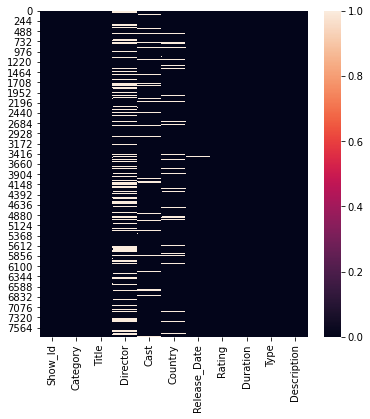

In [11]:
plt.figure(figsize = (6, 6))
sns.heatmap(ntfx_df.isnull())

In [12]:
# yeah it seems like there's a few missing values, specifically in the 3rd, 4th, 5th and 6th rows 

**First Task:** For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [13]:
print("ID of the show is: ",list(ntfx_df.loc[ntfx_df["Title"].eq('House of Cards'), 'Show_Id'])[0])
print("Directors of the show are: ",list(ntfx_df.loc[ntfx_df["Title"].eq('House of Cards'), 'Director'])[0])

ID of the show is:  s2833
Directors of the show are:  Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson


**Second Task:** In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [14]:
ntfx_df["Release_Date"] = pd.to_datetime(ntfx_df["Release_Date"])

In [15]:
sorted(pd.DatetimeIndex(ntfx_df["Release_Date"]).year.value_counts().index)

[2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0]

Text(0, 0.5, 'Count of each Category')

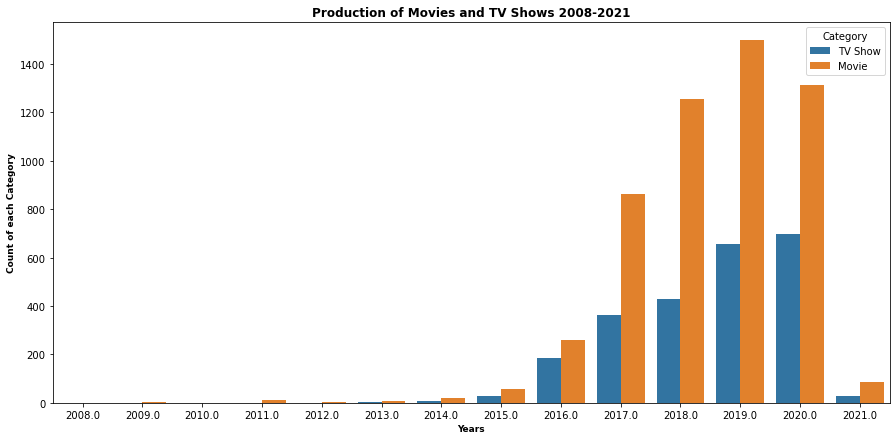

In [16]:
plt.figure(figsize = (15, 7))
sns.countplot(x = (pd.DatetimeIndex(ntfx_df["Release_Date"]).year), 
              hue = ntfx_df["Category"])
plt.title("Production of Movies and TV Shows 2008-2021", 
          fontdict = {'fontsize' : 12, 
                      'fontweight' : 'bold'})
plt.xlabel("Years", 
           fontdict = {'fontsize' : 9, 
                       'fontweight' : 'bold'})
plt.ylabel("Count of each Category", 
           fontdict = {'fontsize' : 9, 
                       'fontweight' : 'bold'})

In [17]:
# So i'd say based on the graph the highest amount of movies and tv shows recorded was in 2019 

**Third Task:** How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

Text(0, 0.5, 'Count of each Category')

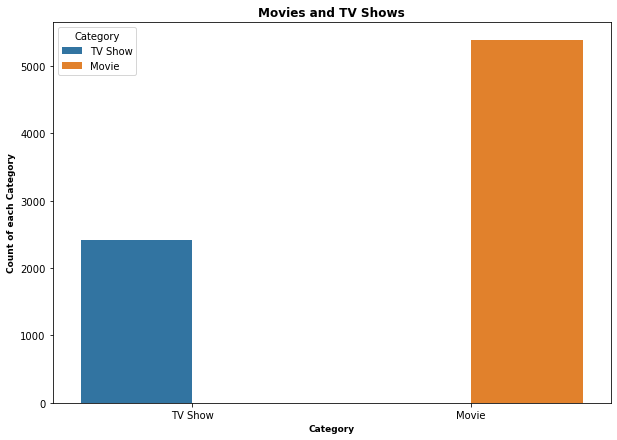

In [18]:
plt.figure(figsize = (10, 7))
sns.countplot(x = ntfx_df["Category"], 
              hue = ntfx_df["Category"])
plt.title("Movies and TV Shows", 
          fontdict = {'fontsize' : 12, 
                      'fontweight' : 'bold'})
plt.xlabel("Category", 
           fontdict = {'fontsize' : 9, 
                       'fontweight' : 'bold'})
plt.ylabel("Count of each Category", 
           fontdict = {'fontsize' : 9, 
                       'fontweight' : 'bold'})

In [19]:
#next time i should learn how to add labels indicating how many are there in each category

**Fourth Task:** Show all the Movies that were released in year 2000.

In [20]:
ntfx_df[(ntfx_df["Category"] == "Movie") & (pd.DatetimeIndex(ntfx_df["Release_Date"]).year == 2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [21]:
# this dataset doesn't have any data that goes back to 2000, the farthest one is from 2008, so i'll just bring data from 2010

In [22]:
ntfx_df[(ntfx_df["Category"] == "Movie") & (pd.DatetimeIndex(ntfx_df["Release_Date"]).year == 2010)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott..."


**Fifth Task:** Show only the Titles of all TV Shows that were released in India only.

In [23]:
ntfx_df[(ntfx_df["Category"] == "TV Show") & (ntfx_df["Country"] == "India")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
86,s87,TV Show,21 Sarfarosh: Saragarhi 1897,NaN,"Luke Kenny, Mohit Raina, Mukul Dev",India,2018-12-01,TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba..."
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
340,s341,TV Show,Agent Raghav,NaN,"Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar,...",India,2017-04-15,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Act...","A mix of brilliance, erudition and skill enabl..."
364,s365,TV Show,Akbar Birbal,NaN,"Kiku Sharda, Vishal Kotian, Delnaaz Irani",India,2020-03-31,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas","From battles of wit to fights for justice, Emp..."
533,s534,TV Show,Anjaan: Rural Myths,NaN,NaN,India,2018-12-15,TV-14,1 Season,"International TV Shows, TV Horror, TV Thrillers",Spine-chilling stories of malevolent spirits u...
...,...,...,...,...,...,...,...,...,...,...,...
6249,s6249,TV Show,The Creative Indians,NaN,NaN,India,2020-08-24,TV-MA,2 Seasons,"Docuseries, International TV Shows",From chefs and comedians to filmmakers and fas...
6400,s6399,TV Show,The Golden Years with Javed Akhtar,NaN,NaN,India,2017-06-01,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t..."
6469,s6468,TV Show,The House That Made Me,NaN,Vinay Pathak,India,2017-03-31,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret..."
7294,s7293,TV Show,Typewriter,NaN,"Aarna Sharma, Aaryansh Malviya, Mikail Gandhi,...",India,2019-07-19,TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries",Three young friends in Goa plan to search an o...


In [24]:
directors = pd.DataFrame(columns = ["Director Name", "Production Count"])
directors["Director Name"] = ntfx_df["Director"].value_counts().index
directors["Production Count"] = list(ntfx_df["Director"].value_counts())

In [25]:
directors.head(10)

,Director Name,Production Count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Youssef Chahine,12
5,Martin Scorsese,12
6,Jay Chapman,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Robert Rodriguez,8


**Seventh Task:** Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [26]:
ntfx_df["Type"].value_counts()

Documentaries                                                 334
Stand-Up Comedy                                               321
Dramas, International Movies                                  320
Comedies, Dramas, International Movies                        243
Dramas, Independent Movies, International Movies              215
                                                             ... 
Romantic TV Shows, TV Action & Adventure, TV Dramas             1
TV Action & Adventure, TV Dramas, Teen TV Shows                 1
Action & Adventure, Cult Movies                                 1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy      1
Horror Movies, International Movies, Sci-Fi & Fantasy           1
Name: Type, Length: 492, dtype: int64

In [27]:
filter_mcuk = ntfx_df[(ntfx_df["Category"] == "Movie") & (ntfx_df["Country"] == "United Kingdom")]

In [28]:
filter_mcuk = filter_mcuk[filter_mcuk["Type"].str.contains("Comedy|Comedies")]

**Eight Task:** In how many movies/shows, Tom Cruise was cast ?

In [29]:
ntfx_df[ntfx_df["Cast"].str.contains("Tom Cruise", na = False)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


**Ninth Task:** What are the different Ratings defined by Netflix ?

In [30]:
ntfx_df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**9.1.** How many Movies got the 'TV-14' rating, in Canada ?

In [32]:
len(ntfx_df[(ntfx_df["Rating"] == "TV-14") & (ntfx_df["Country"] == "Canada")].index)

23

**9.2.** How many TV Shows got the 'R' rating, after year 2018 ?

In [34]:
len(ntfx_df[(ntfx_df["Rating"] == "R") & (pd.DatetimeIndex(ntfx_df["Release_Date"]).year > 2018)].index)

450

**Tenth Task:** What is the maximum duration of a Movie/Show on Netflix ?

In [49]:
movies = ntfx_df[ntfx_df["Category"] == "Movie"]

In [50]:
shows = ntfx_df[ntfx_df["Category"] == "TV Show"]

In [58]:
print("Longest Movie is {} minutes".format(pd.to_numeric(movies["Duration"].str.strip(" min")).max()))

Longest Movie is 312 minutes


In [60]:
print("Longest Show is {} Seasons".format(pd.to_numeric(shows["Duration"].str.strip(" Seasons")).max()))

Longest Show is 16 Seasons


**Eleventh Task:** Which individual country has the Highest No. of TV Shows ?

In [64]:
print("{} has the highest No. of TV Shows".format(shows["Country"].value_counts().index[0]))

United States has the highest No. of TV Shows


**Twelfth Task:** How can we sort the dataset by Year ?

In [69]:
srt_idx = list(pd.DatetimeIndex(ntfx_df["Release_Date"]).year.argsort(axis = 0))

In [80]:
sorted_df = ntfx_df.reindex(srt_idx)

**Thirteenth Task:** Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [83]:
filter_mdtk = ntfx_df[((ntfx_df["Category"] == "Movie") & (ntfx_df["Type"].str.contains("Drama|Dramas"))) |  
                      ((ntfx_df["Category"] == "TV Show") & (ntfx_df["Type"].str.contains("Kids")))]